**Business Case**:
Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs, also known as alveoli, may fill with fluid or pus, causing symptoms such as cough, fever, difficulty breathing, and chest pain. Pneumonia can be caused by various microorganisms, including bacteria, viruses, fungi, or parasites. The exact cause depends on the type of pneumonia.

Here's some relevant knowledge for a business case related to pneumonia:

Healthcare Industry: Pneumonia is a common respiratory infection, and it has a significant impact on the healthcare industry. It contributes to a substantial number of hospital admissions, emergency room visits, and healthcare costs.

Pharmaceutical Industry: The treatment and prevention of pneumonia require pharmaceutical interventions such as antibiotics, antivirals, and vaccines. The development and commercialization of effective medications and vaccines play a vital role in addressing the burden of pneumonia.

Diagnostic Solutions: Accurate and timely diagnosis of pneumonia is crucial for effective management. Innovations in diagnostic technologies, such as rapid and accurate laboratory tests, imaging techniques (e.g., chest X-rays), and point-of-care diagnostics, can aid healthcare professionals in diagnosing pneumonia more efficiently.

Public Health Initiatives: Pneumonia is a significant public health concern, especially for vulnerable populations such as young children, older adults, and individuals with weakened immune systems. Public health efforts focus on raising awareness, promoting vaccination campaigns, and implementing preventive measures to reduce the incidence of pneumonia and its associated complications.

Telemedicine and Remote Monitoring: Remote healthcare solutions, including telemedicine and remote monitoring, can have implications in managing pneumonia cases, especially for individuals in remote areas or those with limited access to healthcare facilities. These technologies facilitate remote consultations, monitoring of symptoms, and early intervention.

Data Analysis and Predictive Modeling: Analyzing large-scale datasets related to pneumonia, such as patient demographics, clinical data, treatment outcomes, and epidemiological trends, can provide valuable insights for business applications. Predictive modeling techniques can help identify high-risk populations, optimize resource allocation, and support evidence-based decision-making in healthcare organizations.

Workforce Health and Productivity: Pneumonia can have a significant impact on workforce health and productivity. Business cases may involve considerations such as employee wellness programs, workplace hygiene measures, and policies for managing employee absences or return-to-work protocols related to pneumonia.

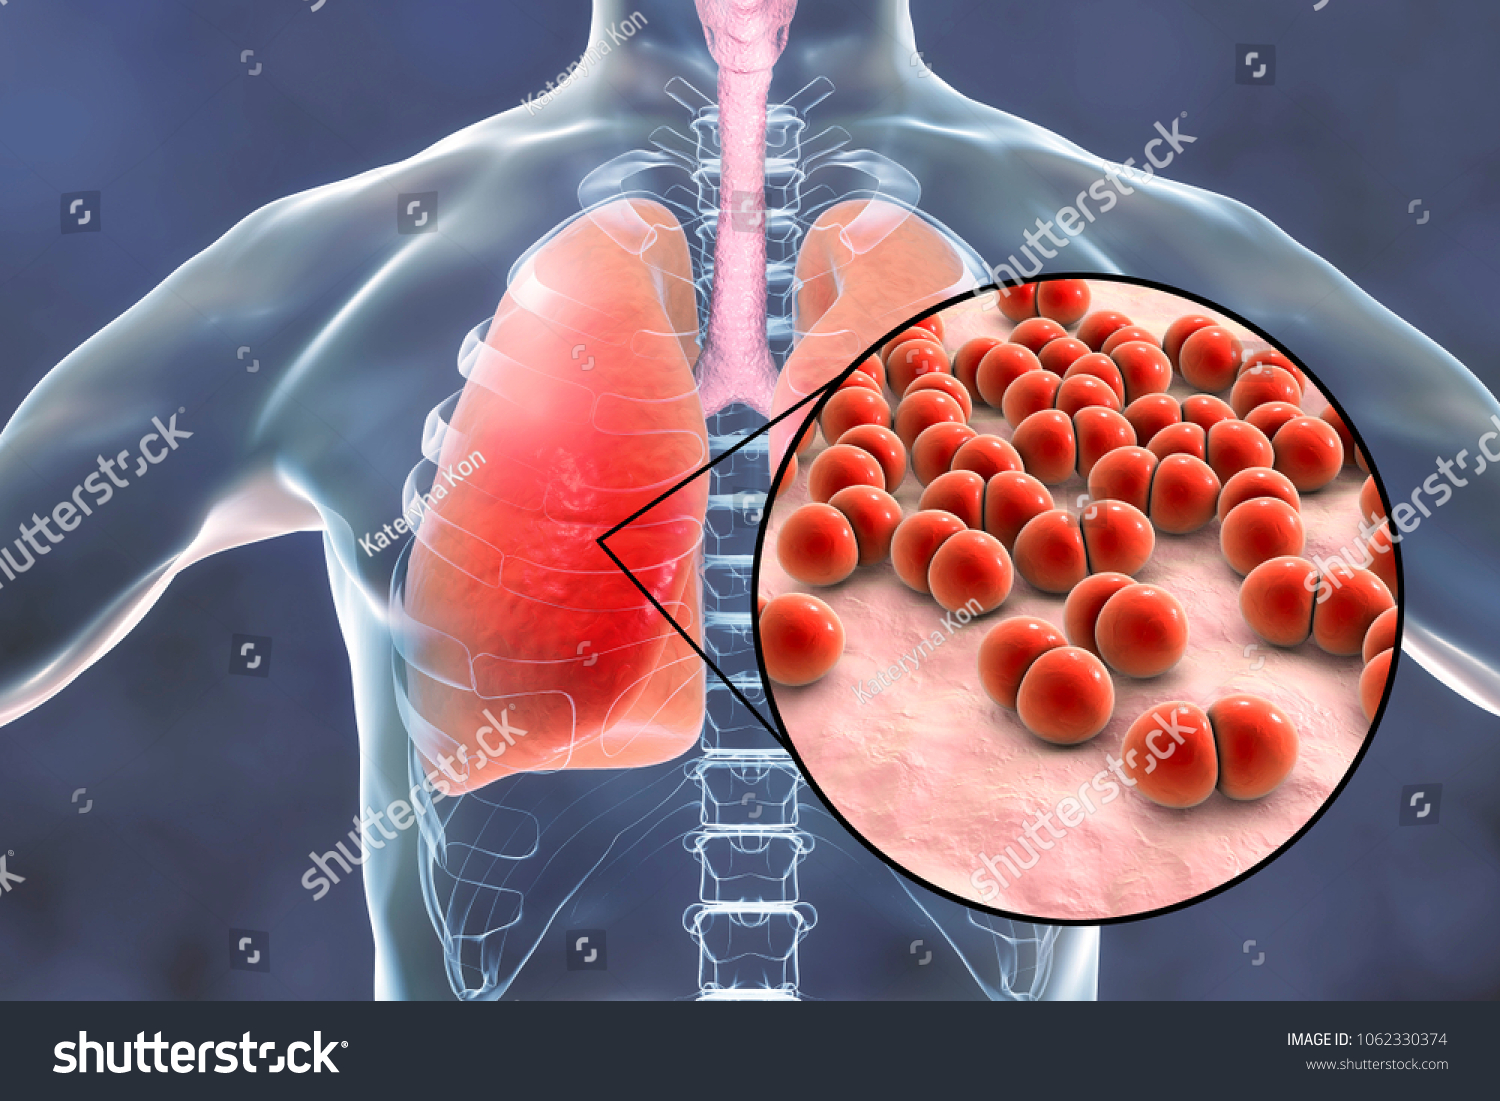**BUSINESS CASE**

**OBJECTIVE**:The ultimate goal of this classification is to develop a reliable and efficient algorithm that can assist healthcare professionals in diagnosing the presence or absence of pneumonia more quickly and accurately, especially in regions where access to skilled medical personnel and diagnostic facilities may be limited.
Thamk you.::

**Understanding the Data**:
Contained 2

### Import Libraries


In [ ]:
# Import libraries
import os
from os import listdir# ,#makedirs, getcwd, remove
from os.path import isfile, join, abspath #exists, isdir, expanduser
#import opendatasets as od
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import random
from pathlib import Path #to be able to use functions using path
import pandas as pd # data processing
import numpy as np # linear algebra
import tensorflow as tf
#from tensorflow.compat.v1 import Session, ConfigProto, set_random_seed
#from tensorflow.python.client import device_lib
import keras
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator #, load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.callbacks import ReduceLROnPlateau
from keras.constraints import maxnorm
import cv2
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from PIL import Image image # visualization library
import imgaug as aug
import imgaug.augmenters as iau
import matplotlib.pyplot as plt
import matplotlib.image as mimg # images
%matplotlib inline
import glob #used to perform pattern matching and check the number of folders in dataset.
import seaborn as sns # image plotting library
import plotly.express as px
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Downloading the data

In [ ]:
# Directories where you'll store the data
data_dir = Path("/content/drive/MyDrive/ai internship/chest extracted")


In [ ]:
# Directories for the training, validation, and test splits
train_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train'
val_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val'
test_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test'

In [ ]:
tf.__version__ # Checking of the version of tensorflow we're working with.

'2.12.0'

### Data Loading

#### Loading of Train Dataset

In [ ]:
os.listdir(train_dir) # it returns a list containing the names of all the files and directories present in that directory.
#particularly the number of files and the name in list form

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [ ]:
train_normal_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL' # setting the path to the normal images in train set
train_pneumonia_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA' # to set the path to the pneumonia images in train set

#### Loading of Validation Dataset

In [ ]:
os.listdir(val_dir) # It returns a list containing the names of all the files and directories present in that directory.

['.DS_Store', 'PNEUMONIA', 'NORMAL']

In [ ]:
valid_normal_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL' #to set the path to the normal images in validation set
valid_pneumonia_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA' #to set the path to the pneumonias images in validation set

####Loading of Test Dataset

In [ ]:
os.listdir(test_dir)

['NORMAL', '.DS_Store', 'PNEUMONIA']

In [ ]:
test_normal_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL' #to set the path to the normal images in test set
test_pneumonia_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA' #to set the path to the pneumonia images in test set

### Labeling

#### Setting the dataset for training

In [ ]:
train_normal = glob.glob(train_normal_dir + "/*.jpeg") #Normal images in the train Folder,concatenating with image format type(jpeg)

# Print the file paths
for image_path in train_normal:
    print(image_path)

/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0790-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0898-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/IM-0691-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0416-0001-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0424-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0507-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0687-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0478-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0388-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL

In [ ]:
train_pneumonia = glob.glob(train_pneumonia_dir + "/*.jpeg")

# Print the file paths
for image_path in train_pneumonia:
    print(image_path)

/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person124_virus_238.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1610_bacteria_4240.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1170_virus_1970.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1619_bacteria_4268.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1177_bacteria_3125.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1478_bacteria_3848.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1270_bacteria_3230.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1551_bacteria_4054.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/person1168_virus_1966.jpeg
/content/drive/MyDriv

In [ ]:
train_set = [] # initialising an empty list to append enteries
for img in train_normal: #to add every image of normals in trainset to the list
  train_set.append((img, 0)) #we add 0 with normal images as label
for img in train_pneumonia:#to add every image of pneumonias in trainset to the list
  train_set.append((img, 1)) #we add 1 with pneumonia images as label

In [ ]:
print(train_set[:15]) #to check what our list looks like

[('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0790-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0898-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/IM-0691-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0416-0001-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0424-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0507-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0687-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0478-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/NORMAL2-IM-0388-0001.jpeg', 0), ('/

In [ ]:
train_set=pd.DataFrame(train_set, columns=["image", "label"], index=None)# creating a dataframe from the list, so that we can use dataframe features

In [ ]:
train_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

image  label
0  /content/drive/MyDrive/ai internship/chest ext...      0
1  /content/drive/MyDrive/ai internship/chest ext...      0
2  /content/drive/MyDrive/ai internship/chest ext...      0
3  /content/drive/MyDrive/ai internship/chest ext...      0
4  /content/drive/MyDrive/ai internship/chest ext...      0

In [ ]:
train_set=train_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
train_set=train_set.reset_index(drop=True) #to set the indexes as if first time
train_set.head()

image  label
0  /content/drive/MyDrive/ai internship/chest ext...      1
1  /content/drive/MyDrive/ai internship/chest ext...      1
2  /content/drive/MyDrive/ai internship/chest ext...      0
3  /content/drive/MyDrive/ai internship/chest ext...      1
4  /content/drive/MyDrive/ai internship/chest ext...      1

#### Setting the dataset for valdiation

In [ ]:
valid_normal = glob.glob(valid_normal_dir + "/*.jpeg") #images are normally stored in the jpeg format.

# Print the file paths
for image_path in valid_normal:
    print(image_path)

/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg


In [ ]:
valid_pneumonia = glob.glob(valid_pneumonia_dir + "/*.jpeg")
# Print the file paths
for image_path in valid_pneumonia:
    print(image_path)

/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg


In [ ]:
valid_set = []

for img in valid_normal: #to add every image of normals in trainset to the list
  valid_set.append((img, 0)) #we add 0 with normal images as label
for img in valid_pneumonia:#to add every image of pneumonias in trainset to the list
  valid_set.append((img, 1)) #we add 1 with pneumonia images as label

In [ ]:
print(valid_set[:15]) #to check what our list look like

[('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg', 1), ('/content/

In [ ]:
valid_set=pd.DataFrame(valid_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
valid_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

image  label
0  /content/drive/MyDrive/ai internship/chest ext...      0
1  /content/drive/MyDrive/ai internship/chest ext...      0
2  /content/drive/MyDrive/ai internship/chest ext...      0
3  /content/drive/MyDrive/ai internship/chest ext...      0
4  /content/drive/MyDrive/ai internship/chest ext...      0

In [ ]:
valid_set=valid_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
valid_set=valid_set.reset_index(drop=True) #to set the indexes as if first time
valid_set.head()

image  label
0  /content/drive/MyDrive/ai internship/chest ext...      1
1  /content/drive/MyDrive/ai internship/chest ext...      1
2  /content/drive/MyDrive/ai internship/chest ext...      0
3  /content/drive/MyDrive/ai internship/chest ext...      1
4  /content/drive/MyDrive/ai internship/chest ext...      0

#### Setting the dataset for test

In [ ]:
import glob

test_normal = glob.glob(test_normal_dir + "/*.jpeg")

# Print the file paths
for image_path in test_normal:
    print(image_path)

/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0368-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0286-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0357-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0279-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0277-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0317-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0283-0001.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0246-0001-0002.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/N

In [ ]:
import glob

test_pneumonia = glob.glob(test_pneumonia_dir + "/*.jpeg")
# Print the file paths
for image_path in test_pneumonia:
    print(image_path)

/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person78_bacteria_378.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person69_virus_129.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person80_bacteria_392.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person67_virus_126.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person63_virus_121.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person75_virus_136.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person94_bacteria_457.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person83_bacteria_410.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/PNEUMONIA/person99_bacteria_474.jpeg
/content/drive/MyDrive/ai internship/chest extracted/chest

In [ ]:
test_set = [] # iniatialising an empty list to add future enteries
for img in test_normal: #to add every image of normals in trainset to the list
  test_set.append((img, 0)) #we add 0 with normal images as label
for img in test_pneumonia:#to add every image of pneumonias in trainset to the list
  test_set.append((img, 1)) #we add 1 with pneumonia images as label

In [ ]:
print(test_set[:15]) #to check what our list look like

[('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0368-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0286-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0357-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0279-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0277-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0317-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0283-0001.jpeg', 0), ('/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test/NORMAL/NORMAL2-IM-0246-0001-0002.jpeg', 0), ('/c

In [ ]:
test_set=pd.DataFrame(test_set, columns=["image", "label"], index=None)#to create a dataframe from the list, so that we can use dataframe features
test_set.head() #to see the first 5 rows of our dataframe, only normals are shown since we added them first.

image  label
0  /content/drive/MyDrive/ai internship/chest ext...      0
1  /content/drive/MyDrive/ai internship/chest ext...      0
2  /content/drive/MyDrive/ai internship/chest ext...      0
3  /content/drive/MyDrive/ai internship/chest ext...      0
4  /content/drive/MyDrive/ai internship/chest ext...      0

In [ ]:
test_set=test_set.sample(frac=1) #to shuffle all the rows in dataframe so that we can see normal and pneumonia in random
test_set=test_set.reset_index(drop=True) #to set the indexes as if first time
test_set.head()

image  label
0  /content/drive/MyDrive/ai internship/chest ext...      0
1  /content/drive/MyDrive/ai internship/chest ext...      0
2  /content/drive/MyDrive/ai internship/chest ext...      1
3  /content/drive/MyDrive/ai internship/chest ext...      0
4  /content/drive/MyDrive/ai internship/chest ext...      1

### Data Exploration

In [ ]:
# Normal Image
train_normal_count= train_set.loc[train_set["label"]==0]["image"].count()
print("Total number of normal images:", train_normal_count)

Total number of normal images: 1341


In [ ]:
# Pneumonia Image
train_pneumonia_count= train_set.loc[train_set["label"]==1]["image"].count()
print("Total number of pneumonia images:", train_pneumonia_count)

Total number of pneumonia images: 3875


####  Visualization of normal and pneumonia images from Train Dataset

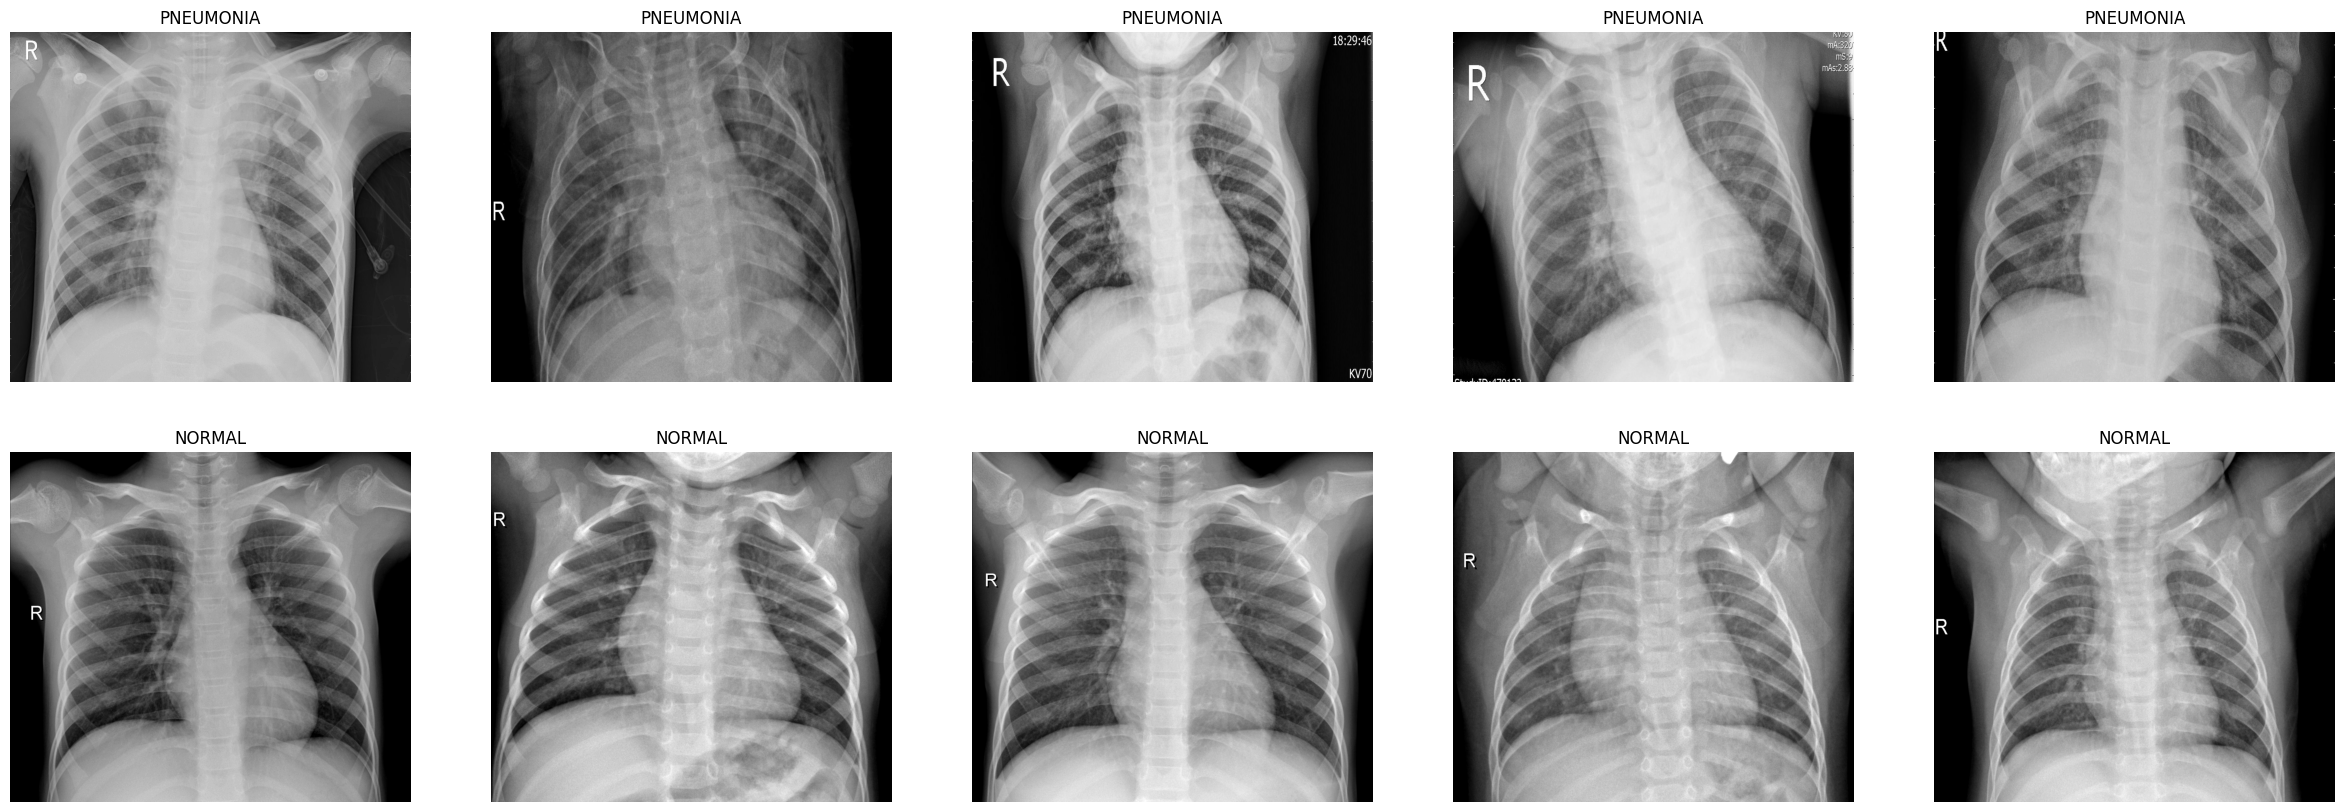

In [ ]:
# Get few samples for both the classes
pneumonia_samples = (train_set[train_set["label"] == 1]["image"].iloc[:5]).tolist()
normal_samples = (train_set[train_set["label"] == 0]["image"].iloc[:5]).tolist()

# Combining the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data
f, ax = plt.subplots(2,5, figsize = (30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i % 5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i % 5].set_title("PNEUMONIA")
    else:
        ax[i//5, i % 5].set_title("NORMAL")
    ax[i//5, i % 5].axis('off')
    ax[i//5, i % 5].set_aspect('auto')
plt.show()

#### Plotting the Data Distribution

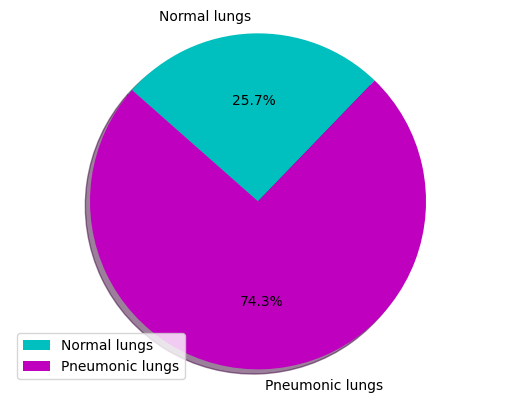

In [ ]:
fig1,ax1= plt.subplots()
sizes=[train_normal_count, train_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal lungs","Pneumonic lungs"], autopct="%1.1f%%", shadow=True, colors=["c","m"])
ax1.axis("equal")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Case Distribution')

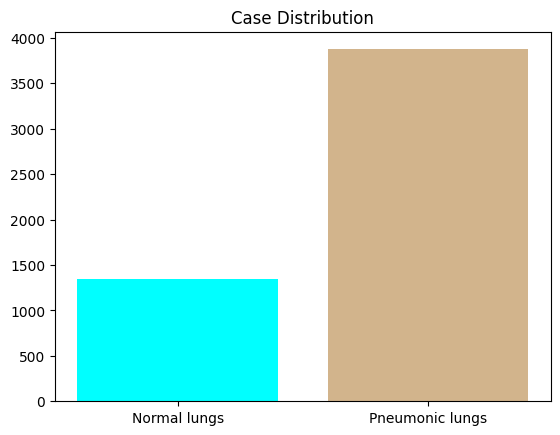

In [ ]:
fig2, ax2=plt.subplots()
ax2.bar(height=sizes, x=["Normal lungs", "Pneumonic lungs"], color=["cyan", "tan"])
plt.title("Case Distribution")

  We have an imbalanced image dataset:, the pneumonia lungs images are more than the normal with a percentage of 74.3 and 25.7 respectively ,hence We will balance this data by increasing the Normal image dataset using Data Augmentation to correct this imbalance.

### Data Preparation

#### Data Distribution

In [ ]:
img_size = 224 # initialising image size to 224 so it can also be used during transfer learning where vgg19 suports such size


In [ ]:
labels = ['PNEUMONIA', 'NORMAL'] # The names of the two classes of the images

In [ ]:
import numpy as np #numerical python library for numerical computations
import cv2

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is not None:  # Check if the image is valid
                    # Reshaping images to preferred size
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    data.append([resized_arr, class_num])
                else:
                    print(f"Invalid image: {os.path.join(path, img)}") # if invalid print invalid images
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [ ]:
train = get_training_data(train_dir)
test = get_training_data(test_dir)
val = get_training_data(val_dir)

Invalid image: /content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/PNEUMONIA/.DS_Store
Invalid image: /content/drive/MyDrive/ai internship/chest extracted/chest_xray/train/NORMAL/.DS_Store
Invalid image: /content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/PNEUMONIA/.DS_Store
Invalid image: /content/drive/MyDrive/ai internship/chest extracted/chest_xray/val/NORMAL/.DS_Store


In [ ]:
# Initialize multiple lists By initializing multiple lists, you can maintain structured and organized data, facilitate parallel processing or analysis
#and simplify the management of complex information structures.
X_train, X_val, X_test = ([], ) * 3
y_train, y_val, y_test = ([], ) * 3

#Appending individual labels and The goal is to train the model to make accurate predictions or classifications on unseen data based on the learned patterns
#from the training datase
for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

#### Data Normalization

In [ ]:
#In deep learning, data normalization refers to the process of transforming the input data to have a consistent scale or distribution.
def normalize_dataset(dataset):
    for i in range(len(dataset)):
        dataset[i] = cv2.normalize(dataset[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

def normalize_datasets(X_train, X_test, X_val):
    normalize_dataset(X_train)
    normalize_dataset(X_test)
    normalize_dataset(X_val)

In [ ]:
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_val = np.array(X_val)


#### Reshaping the images for easy convergence.

In [ ]:
X_train = X_train.reshape (-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

##  DATA AUGMENTATION USING IMAGE DATA GENERATOR.

Data augmentation is a technique used in machine learning and computer vision to artificially increase the size and diversity of a training dataset by applying various transformations to the existing data.

### Getting Train Generator

In [ ]:
# normalize and augment images
image_generator = ImageDataGenerator(
  featurewise_center = False, # set input mean to 0 over the dataset
  samplewise_center = False, # set each sample mean to 0
  featurewise_std_normalization = False, #divide inputs by std of the dataset
  samplewise_std_normalization = False, # divide each input by its std
  zca_whitening=False,  # apply ZCA whitening
  rotation_range =30, #randomly rotate images in the range
  zoom_range = 0.2, #randomly zoom image
  width_shift_range = 0.1, #randomly shift images horizontally
  height_shift_range = 0.1, #randomly shift images vertically
  horizontal_flip = True, #randomly flip images
  vertical_flip = False) #randomly flip images

image_generator.fit(X_train)

## BUILDING MODEL ARCHITECTURE

### D.1 Building CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224,224,1))) # First input layer
model.add(BatchNormalization()) # Normalize the activations of intermediate layers.
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')) # Max pool is a feature extraction layer
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))#Feeding 80% of the images to the network to reduce overfitting
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2)) # Feeding 80% of the images to the network to reduce overfitting
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same')
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid')) #It maps the input values to a range between 0 and 1 mostly for binary classification.
model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     2

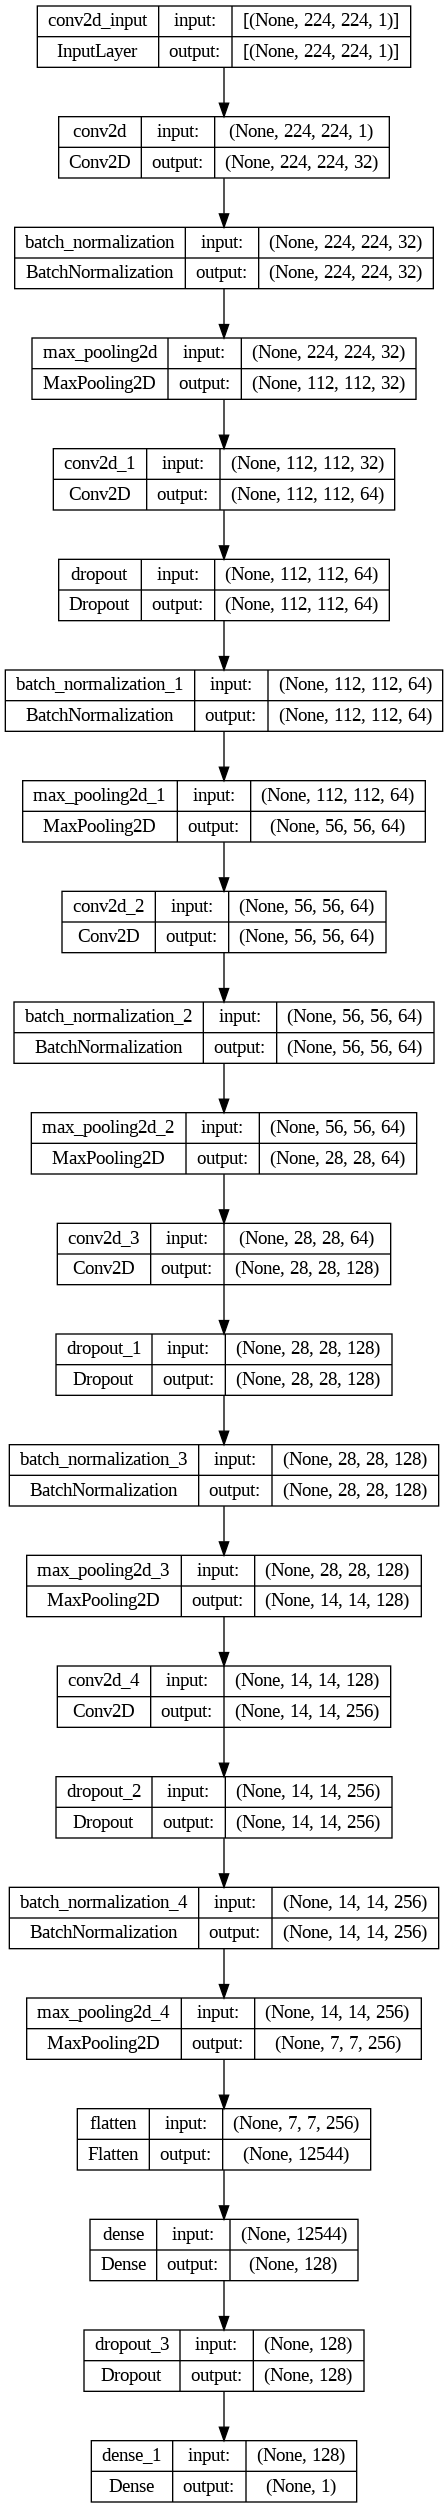

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)
# verbose = #controls the amount of information or output displayed in each training step
#patience = Patience determines the number of consecutive epochs during which the validation loss or performance metric is allowed to worsen before stopping the training.


In [ ]:
history = model.fit(image_generator.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=image_generator.flow(X_val, y_val), callbacks=[learning_rate_reduction])

Epoch 1/10
183/183 [==============================] - 1567s 9s/step - loss: 0.3888 - accuracy: 0.8670 - val_loss: 0.9404 - val_accuracy: 0.5292 - lr: 0.0010
Epoch 2/10
183/183 [==============================] - 1570s 9s/step - loss: 0.2518 - accuracy: 0.9054 - val_loss: 0.4242 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 3/10
183/183 [==============================] - 1389s 8s/step - loss: 0.2002 - accuracy: 0.9283 - val_loss: 0.3459 - val_accuracy: 0.8899 - lr: 0.0010
Epoch 4/10
183/183 [==============================] - 1420s 8s/step - loss: 0.1880 - accuracy: 0.9307 - val_loss: 2.0369 - val_accuracy: 0.7502 - lr: 0.0010
Epoch 5/10
183/183 [==============================] - 1440s 8s/step - loss: 0.1870 - accuracy: 0.9324 - val_loss: 0.2475 - val_accuracy: 0.8922 - lr: 0.0010
Epoch 6/10
183/183 [==============================] - 1477s 8s/step - loss: 0.1731 - accuracy: 0.9395 - val_loss: 0.3712 - val_accuracy: 0.8330 - lr: 0.0010
Epoch 7/10
183/183 [==============================] - ETA:

In [ ]:
# Save the model
model.save('model.h5')
print ("Model saved successfully!")

Model saved successfully!


In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

183/183 [==============================] - 264s 1s/step - loss: 0.1560 - accuracy: 0.9483
Loss of the model is -  0.15595386922359467
183/183 [==============================] - 272s 1s/step - loss: 0.1560 - accuracy: 0.9483
Accuracy of the model is -  94.82582211494446 %


In [ ]:
# From this it reveals that as loss reduces accuracy increases ie they are inversely proportional.

##  MODEL EVALUATION

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions = predictions.reshape(1, -1)[0]
predictions[:15]


183/183 [==============================] - 266s 1s/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
epochs = [i for i in range(11)]
fig , ax = plt.subplots(1,2)
train_acc =  history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
epochs = [i for i in range(11)]
fig , ax = plt.subplots(1,2)
train_acc =  history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'bo-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'go-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

#**Note**:
The curves wasnt displayed too much computation time to display, Probably i would cut a random subset of data to train

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.95      0.98      0.97      4273
   Normal (Class 1)       0.95      0.85      0.90      1583

           accuracy                           0.95      5856
          macro avg       0.95      0.92      0.93      5856
       weighted avg       0.95      0.95      0.95      5856



In [ ]:
cm = confusion_matrix(y_test, predictions)
cm


array([[4204,   69],
       [ 234, 1349]])

In [ ]:
cm = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])


<Axes: >

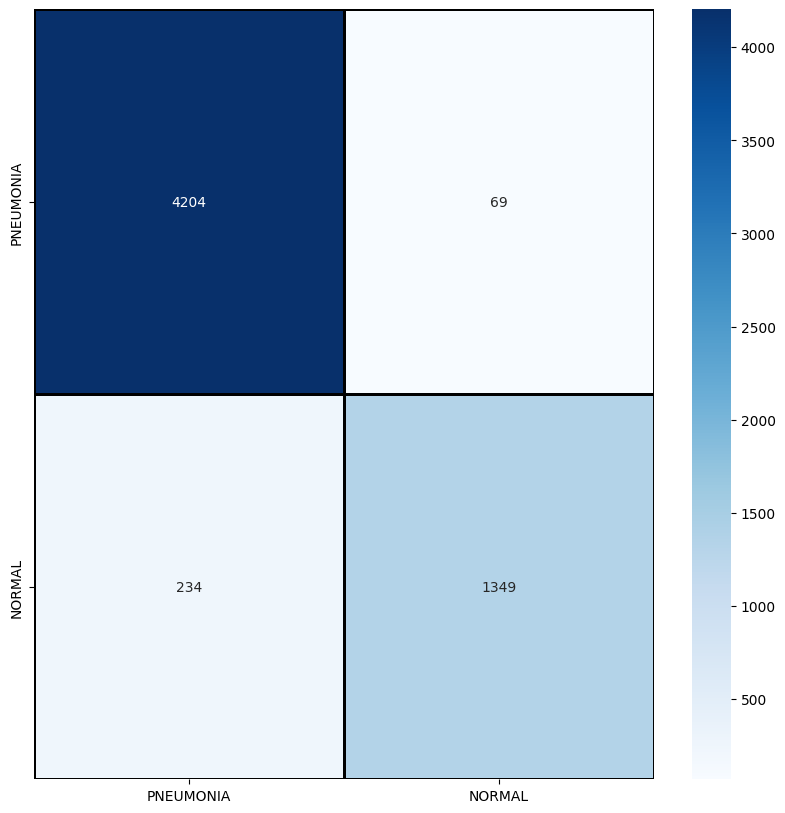

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

     
 TP (4204)   FN (69),
 FP (234)   TN (1349)


False positive = The predicted label is positive (1), but the actual label is negative (0).,234

False Negative = False Negative (FN): The predicted label is negative (0), but the actual label is positive (1),69

True Positive =rue Positive (TP): The predicted label and the actual label are both positive (1),4204


True Negative = True Negative (TN): The predicted label and the actual label are both negative (0).,1349

In [ ]:
correct = np.nonzero(predictions == y_test)[0] # Creating correct variable
incorrect = np.nonzero(predictions != y_test)[0] # Creating incorect valuable to be used for inferencing


INFERENCING

Visualising Some of the Correctly Predicted Classes

<ipython-input-61-8132b79f4c30>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i+1)


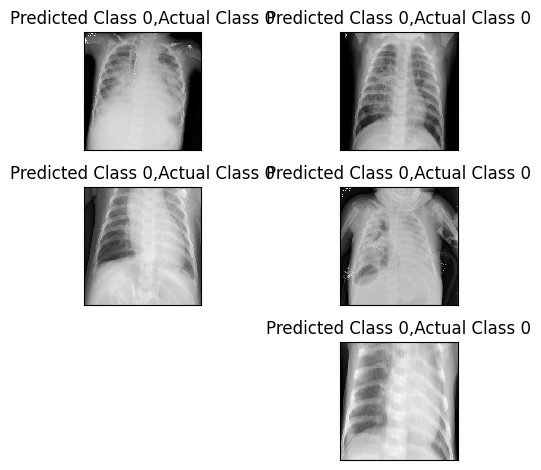

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(
        predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1


Visualising Some of the Incorrectly Predicted Class

<ipython-input-62-878b93e0d87a>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i+1)


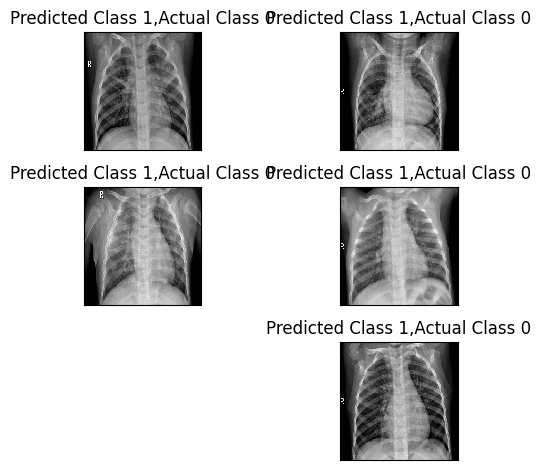

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1


**Using Transfer Learning**

Transfer learning is a machine learning technique in which knowledge gained from training a model on one task or dataset is utilized to improve the performance of a model on a different but related task or dataset. Instead of training a model from scratch on the target task, transfer learning leverages the pre-trained knowledge from a source task or dataset.

The idea behind transfer learning is that the learned representations or features extracted by a model from the source task are often general and can be valuable for the target task. By leveraging these pre-trained representations, the model can benefit from the knowledge learned from the source task, even if the source and target tasks are different.

Here are the typical steps involved in transfer learning:

Pre-training: A model (usually a deep neural network) is trained on a large-scale dataset, often with a large number of labeled examples, for a source task. This pre-training step aims to learn general features or representations from the source data.

Transfer: The pre-trained model's weights and learned representations are used as the starting point for training a new model on a target task or dataset. The idea is to initialize the model with the pre-trained weights and then fine-tune it on the target data to adapt the learned representations to the target task.

Fine-tuning: During the fine-tuning step, the parameters of the pre-trained model are further optimized or adjusted using the target dataset. However, the extent of fine-tuning varies depending on factors such as the similarity between the source and target tasks and the size of the target dataset. Sometimes, only the top layers of the model are modified, while other times, a larger portion of the model is fine-tuned.

Transfer learning offers several advantages, including:

Improved performance: Transfer learning can help achieve better performance on the target task, especially when the target dataset is limited or lacks sufficient labeled examples.

Reduced training time: By starting from pre-trained weights, transfer learning can significantly reduce the training time required to achieve

**USING VGG19**
VGG-19, short for Visual Geometry Group 19, is a deep convolutional neural network architecture that was developed by the Visual Geometry Group at the University of Oxford. The VGG network architecture was introduced in the research paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition" by Karen Simonyan and Andrew Zisserman, which was published in 2014.

VGG-19 is a variant of the VGG network that consists of 19 layers, including 16 convolutional layers and 3 fully connected layers. The number in its name (19) indicates the total number of layers in the network. The architecture is known for its simplicity and uniformity, with small 3x3 convolutional filters used throughout the network. The authors of the VGG paper showed that by increasing the depth of the network, it was possible to improve the performance of the model on image recognition tasks.

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

# Load the VGG19 model
model = VGG19(weights='imagenet')

# Print the model summary
model.summary()

574710816/574710816 [==============================] - 16s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
# Set the desired input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

In [ ]:
# Load the VGG19 model pre-trained on ImageNet
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)


80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Set up data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Set up data augmentation for validation/test data
valid_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
# Set the paths to your train, validation, and test directories
train_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/train'
valid_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/val'
test_dir = '/content/drive/MyDrive/ai internship/chest extracted/chest_xray/test'

In [ ]:

# Set the batch size and number of training/validation steps per epoch
batch_size = 32
#train_steps_per_epoch = len(train_datagen.flow_from_directory(train_dir, target_size=input_shape[:2], batch_size=batch_size))
#valid_steps_per_epoch = len(valid_datagen.flow_from_directory(valid_dir, target_size=input_shape[:2], batch_size=batch_size))


In [ ]:
# Set the number of training epochs
num_epochs = 10
# Train the model
model.fit(
    train_datagen.flow_from_directory(train_dir, target_size=input_shape[:2], batch_size=batch_size),
    validation_data=valid_datagen.flow_from_directory(valid_dir, target_size=input_shape[:2], batch_size=batch_size),
    epochs=num_epochs
)



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
 35/163 [=====>........................] - ETA: 1:01:33 - loss: 1.5802 - accuracy: 0.7125

In [ ]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_steps = len(test_datagen.flow_from_directory(test_dir, target_size=input_shape[:2], batch_size=batch_size))
test_loss, test_accuracy = model.evaluate(test_datagen.flow_from_directory(test_dir, target_size=input_shape[:2], batch_size=batch_size), steps=test_steps)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

**NOTE**:
I HAD SERIOUS DIFFICULTIES TRAINING THIS DATA, TOO MUCH TRAINING TIME, BUT STILL MAINTAINED THE VGG16 TO COMPLETE MY NOTEBOOK AND COMPLIMENT IT WITH TRANSFER LEARNING ALONGSIDE CONVENTIONAL SEQUENTIAL MODEL. THANKS